In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [3]:
def improve_data(df, replace = 1):
    for column in df:
        if df[column].dtypes == 'object' or df[column].dtypes == 'bool':
            if df[column].isna().sum():
                df[column] = df[column].ffill()
        if df[column].dtypes == 'int64':
            if df[column].isna().sum():
                if replace == 0:
                    df[column] = df[column].fillna(0)
                if replace == 1:
                    df[column] = df[column].fillna(df[column].mean())
                if replace == 2:
                    df[column] = df[column].ffill()
        if df[column].dtypes == 'float64':
            if df[column].isna().sum():
                if replace == 0:
                    df[column] = df[column].fillna(0.0)
                if replace == 1:
                    df[column] = df[column].fillna(df[column].mean())
                if replace == 2:
                    df[column] = df[column].ffill()
    return df

def normalize_data(df, nor = 0):
    for col in df:
        if df[col].dtypes == 'float64' or df[col].dtypes == 'int64':
            if nor == 0:
                Xmax = max(df[col])
                Xmin = min(df[col])
                for i in range(len(df[col])):
                    df[col][i] = (df[col][i] - Xmin)/(Xmax-Xmin)
            if nor == 1:
                Xmean = df[col].mean()
                sig = df[col].std()
                for i in range(len(df[col])):
                    df[col][i] = (df[col][i] - Xmean)/sig
    return df

In [4]:
def plotScatter(model):
    cluster1 = model[0]
    cluster2 = model[1]
    plt.figure(figsize=(12,9))
    plt.plot(cluster1.iloc[:, 0], cluster1.iloc[:, 1])
    plt.plot(cluster2.iloc[:, 0], cluster2.iloc[:, 1])
    plt.scatter(cluster2.iloc[:, 0], cluster2.iloc[:, 1], label='cluster 1')
    plt.scatter(cluster1.iloc[:, 0], cluster1.iloc[:, 1], label='cluster 2')
    plt.xticks(np.arange(0, 1.05, step=0.05))
    plt.yticks(np.arange(0, 1.05, step=0.05))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('KRAB clustering')
    plt.grid()
    plt.legend()

In [5]:
df = pd.read_csv('dmd.csv')
df = df.rename(columns={'h':'x', 'pk':'y'})
df = df[['x','y']]
df = improve_data(df)
df = normalize_data(df)
df = df[:50]

In [6]:
df

,x,y
0,0.825688,0.074618
1,0.779817,0.083946
2,0.701835,0.113808
3,0.718320,0.113808
4,0.775229,0.039181
5,0.908257,0.101673
6,0.781537,0.083017
7,0.752294,0.109143
8,0.752294,0.092345
9,0.770642,0.116595


In [7]:
def euklid_dist(dot1, dot2):
    return np.sqrt(np.subtract(dot1, dot2)**2).sum()

In [8]:
def KRAB(dataframe):
    df = dataframe.copy()
    starter = random.randint(0, len(df))
    distances = [starter]
    rasst = []
    listing = []
    for i in range(df.shape[0]):
        if np.array_equal(df.iloc[starter], df.iloc[i]):
            listing.append(1000000)
            continue
        listing.append(euklid_dist(df.iloc[starter], df.iloc[i]))
    distances.append(np.argmin(listing))
    rasst.append(min(listing))
    
    for j in range(df.shape[0]-1):
        tmp = []
        for i in range(df.shape[0]-1):
                if np.array_equal(df.loc[distances[-1]], df.iloc[i]) or i in distances:
                    #print(str(i)+" ->", 1000000)
                    tmp.append(1000000)
                    continue
                #print(str(i) + " ->", euklid_dist(df.loc[distances[-1]], df.iloc[i]))
                tmp.append(euklid_dist(df.loc[distances[-1]], df.iloc[i]))
        distances.append(np.argmin(tmp))
        rasst.append(min(tmp))
    
    distances = distances[:len(df)-1]
    rasst = rasst[:len(df)-2]
    
    cluster1 = []
    cluster2 = []
    dist1 = []
    dist2 = []
    d = max(rasst)
    
    for i in range(np.argmax(rasst)+1, len(distances)):
        cluster1.append(distances[i])
    for i in range(np.argmax(rasst)+1):
        cluster2.append(distances[i])
    
    for i in range(np.argmax(rasst)+1, len(rasst)):
        dist1.append(rasst[i])
    for i in range(np.argmax(rasst)):
        dist2.append(rasst[i])
    
    new_arr = []
    for i in cluster1:
        new_arr.append(df.loc[i])
    c1 = pd.DataFrame(data=new_arr)
    
    new_arr = []
    for i in cluster2:
        new_arr.append(df.loc[i])
    c2 = pd.DataFrame(data=new_arr)
    
    return c1, c2, dist1, dist2, d

In [9]:
model = KRAB(df)

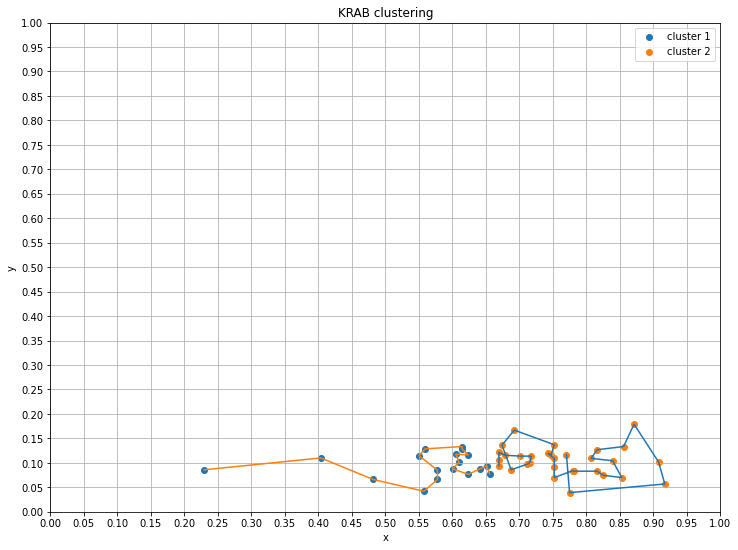

In [10]:
plotScatter(model)

<h4>Міра близькості об'єктів всередині класів</h4>

In [310]:
def P(model):
    len_c1 = model[2]
    len_c2 = model[3]

    P1 = sum(len_c1)/(len(len_c1))
    P2 = sum(len_c2)/(len(len_c2))
    return P1, P2

In [311]:
P(model)

(0.1601988785364077, 0.035431742264981386)

<h4>Загальна міра близькості внутрішніх точок </h4>

In [312]:
def ro(model):
    arr = P(model)
    return sum(arr)/len(arr)

In [367]:
p = ro(model)
p

0.09781531040069455

<h4>Відстань між класами</h4>

In [365]:
def dist(model):
    return model[4]/2

In [366]:
d = dist(model)
d

0.15588127382508016

<h4>Загальна міра неоднорідності</h4>

In [340]:
def lambd(model):
    alpha1 = random.choice(model[2])
    beta1 = min(model[2][model[2].index(alpha1)-1], model[2][model[2].index(alpha1)+1])
    
    alpha2 = random.choice(model[3])
    beta2 = min(model[3][model[3].index(alpha2)-1], model[3][model[3].index(alpha2)+1])
    
    lamb1 = beta1 / alpha1
    lamb2 = beta2 / alpha2
    
    return (lamb1 + lamb2)/2

In [360]:
lamb = lambd(model)
lamb

0.841716850142648

<h4>Рівномірність розподілу точок</h4>

In [361]:
def H(model):
    first = len(model[0])
    second = len(model[1])
    M = first+second+1
    return (first/M * second/M)*4

In [362]:
h = H(model)
h

0.20231404958677685

<h4>Загальний критерій якості в алгоритмі КРАБ</h4>

In [363]:
def F(d, h, lamb, p):
    return np.log((d * h)/(lamb * p))

In [364]:
F(d, h, lamb, p)

-0.9596089447504869